In [46]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = (boston_housing.load_data())
train_data.shape, train_targets.shape, test_data.shape, test_targets.shape

((404, 13), (404,), (102, 13), (102,))

In [47]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [48]:
import matplotlib.pyplot as plt

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

def plot_history(history, begin=1, metric='loss', ma=5):
    loss_values = moving_average(history[f"{metric}"][begin:], ma)
    val_loss_values = moving_average(history[f"val_{metric}"][begin:], ma)
    epochs = range(begin,len(loss_values)+begin)
    plt.plot(epochs, loss_values, "b", label=f"Training {metric}")
    plt.plot(epochs, val_loss_values, "r", label=f"Validation {metric}")
    plt.title(f"Training and validation {metric}")
    plt.xlabel("Epochs")
    plt.ylabel(f"{metric}")
    plt.legend()
    plt.show()

In [49]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1),
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

Processing fold #0


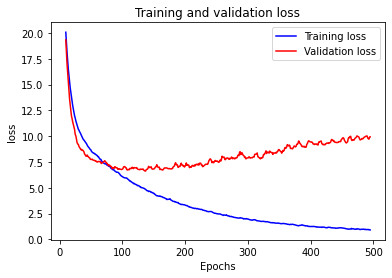

Processing fold #1


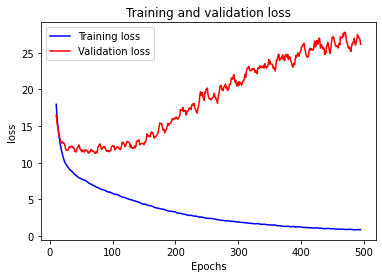

Processing fold #2


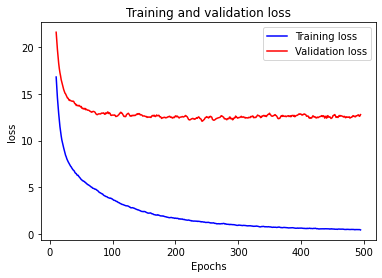

Processing fold #3


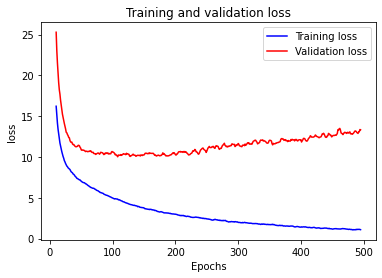

In [50]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                         train_data[(i+1) * num_val_samples:]],
                                         axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                         train_targets[(i+1) * num_val_samples:]],
                                         axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    plot_history(history.history, 10)
    histories.append(history.history)


In [51]:
average_histories = {}
new_histories = {}
for key in histories[0].keys():
    new_histories[key] = np.empty((k,num_epochs))
    for fold in range(k):
        new_histories[key][fold,:] = histories[fold][key]
    average_histories[key] = np.mean(new_histories[key], axis=0)

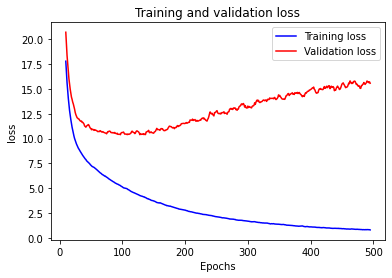

In [52]:
plot_history(average_histories, 10)

In [53]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=num_epochs, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 946us/step - loss: 10.7589 - mae: 2.2827


In [60]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=100, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 829us/step - loss: 17.6969 - mae: 2.5843
